### Agrupación con **md.rmsd()** y **scipy.cluster.hierarchy()**

#### Agrupar la trayectoria de dipeptidos de Ala (utilizando RMSD y agrupamiento jerárquico

In [1]:

from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform



#### Cargar trayectoria

In [2]:
traj = md.load('ala2.h5')

#### Calcular todos los RMSD's por pares entre conformaciones

In [3]:
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd:%f nm' %np.max(distances))

Max pairwise rmsd:0.188493 nm


### Implementar el algoritmo de enlace promedio

La agrupación sólo acepta forma reducida. Las comprobaciones de "Squareform" son demasiado estrictas.

In [7]:
assert np.all(distances - distances.T < 1e-6)
reduced_distances = squareform(distances, checks = False)

In [8]:
linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method = 'average')

#### Generar dendograma

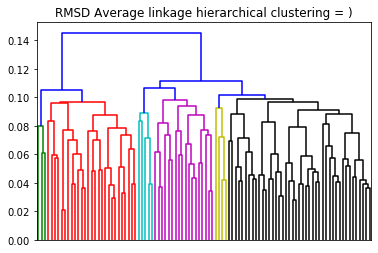

In [11]:
plt.title('RMSD Average linkage hierarchical clustering = )')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')
